## **Validation of Chat GPT data with ML models**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Import Libraries**

In [2]:
# install open AI library to use Chat GPT API"
! pip install openai
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [ ]:
# import needed libraries"

import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import openai
import time
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### **Experiment 1 : Baseline Data**

In [ ]:
# Loading the dataset
train = pd.read_excel('/content/drive/MyDrive/Output/Experiment_1_train.xlsx')
val = pd.read_excel('/content/drive/MyDrive/Output/Experiment_1_val.xlsx')
# train

In [ ]:
# function to clean the data
stops = set(stopwords.words("english"))
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [ ]:
# Applying the data cleaning function and split Y varaible
train['tweet'] = train['tweet'].map(lambda x: cleantext(x))
val['tweet'] = val['tweet'].map(lambda x: cleantext(x))

trainy=train['label']
testy=val['label']

In [ ]:
# fit TfidfVectorizer on training data and transform test data

tf = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None, lowercase=False)
trainx=tf.fit_transform(train['tweet'])
testx = tf.transform(val['tweet'])

In [ ]:
# Modelling
models=[LogisticRegression(), svm.SVC(), GradientBoostingClassifier(), DecisionTreeClassifier() ]
names= ['Logistic Regression', "Support Vector Machine",  'Gradient Boost', 'Decision Tree']

Result={}
for name, model in zip(names, models):
  scores=[]
  model.fit(trainx, trainy)
  y_pred=model.predict(testx)
  a=model.score(testx, testy)
  p=precision_score(testy, y_pred, average='weighted')
  r=recall_score(testy, y_pred, average='weighted')
  f=f1_score(testy, y_pred, average='weighted')
  scores.append(a)
  scores.append(p)
  scores.append(r)
  scores.append(f)

  print(name, scores)

Logistic Regression [0.9261682242990654, 0.9268283364013122, 0.9261682242990654, 0.926206239364456]
Support Vector Machine [0.9345794392523364, 0.9351743283787978, 0.9345794392523364, 0.9346123818466304]
Gradient Boost [0.8672897196261682, 0.8704142214985151, 0.8672897196261682, 0.867315800912845]
Decision Tree [0.8392523364485981, 0.8392702121292285, 0.8392523364485981, 0.8391369461783289]


### **Experiment 2: Chat GPT data Alone**

**Data Curation From Chat GPT**

In [ ]:
# Queries

Queries=["What are the global covid-19 statistics as of June 21st 2023?",
"What are the measures to curtail covid-19 from spreading?",
"What are the symptoms of covid-19?",
"What can one do if one has symptoms of covid-19?",
"What to do if one is tested positive for covid 19?",
"How To treat covid 19 symptoms at home?",
"What to do if one is feeling breathless?",
"what is covid 19?",
"when should i get a test for covid-19?",
"is there a vaccine for covid 19?",
"who is most at risk of severe illness from covid-19?",
"what test should I get to see if i have covid-19?",
"What to do if you have tested positive to covid 19?",
"Which COVID-19 vaccine will I get?",
"Who can get a 1st and 2nd dose of covid 19 vaccine?",
"Who can get a booster dose of covid 19 vaccine?",
"What to bring to your appointment for covid 19 vaccine?",
"People at increased risk from COVID-19 aged under 16 years old?",
"People at increased risk from COVID-19 aged 16 years old and over?"]

Queries=["Who can get a 1st and 2nd dose?",
"What do i do to prevent covid19?",
"What happens to people who get COVID-19?",
"Who is most at risk of severe illness from COVID-19?",
"Are there long-term effects of COVID-19?",
"How can we protect others and ourselves if we don't know who is infected?",
"When should I get a test for COVID-19?",
"What test should I get to see if I have COVID-19?",
"I want to find out if I had COVID-19 in the past, what test could I take?",
"What is the difference between isolation and quarantine?",
"What should I do if I have been exposed to someone who has COVID-19?",
"How long does it take to develop symptoms?",
"Are antibiotics effective in preventing or treating COVID-19?"]

Queries=["Are there treatments for COVID-19?",
"Are people living with HIV at increased risk of being infected with SARS-CoV-2 or develop more severe COVID-19?",
"Should the treatment or prevention of COVID-19 be different in people living with HIV?",
"Can antiretrovirals be used to treat COVID-19 or prevent SARS-CoV-2 infection?",
"Are COVID-19 vaccines safe for people living with HIV?",
"Can COVID-19 infection affect HIV test results?",
"Do COVID-19 vaccines provide protection for people living with HIV?",
"Should people living with HIV get vaccines early in the roll out?",
"Should all people living with HIV receive additional doses of COVID-19 vaccine?",
"What is WHO position on clinical trials/research while the COVID-19 pandemic is ongoing?",
"What can WHO and the world do to support people living with HIV to live a healthy life?",
"What is serology?",
"What is the difference between molecular testing and serologic testing?",
"What is the purpose of serologic testing?",
"Does the presence of antibodies mean that a person is immune?",
"Can people who have had SARS-CoV-2 infection be re-infected?",
"What are the results of seroprevalence studies published to date?",
"What is herd immunity?",
"What does it mean to say a virus mutates or changes?",
"Should I be concerned about SARS-CoV-2?",
"What is WHO doing to monitor and understand the changes in SARS-CoV-2?",
"How does SARS-CoV-2 change when it infects animals, and what are the implications?"]


In [ ]:
"Chat GPT function to get query response"
def get_completion(prompt, model="gpt-3.5-turbo"):
  messages = [{"role": "user", "content": prompt}]
  response = openai.ChatCompletion.create(
  model=model,
  messages=messages,
  temperature=0)
  return response.choices[0].message["content"]

"Getting responses from Chat GPT"
q_a={}
for query in Queries[:2]:
  prompt = query + "Give the answer in paragraphs, each paragraph containing a unit of information or fact"
  response = get_completion(prompt)
  q_a[query]=response
  time.sleep(5)

"Convert responses to dataframe"
Questions=[]
Answers=[]
for a, b in q_a.items():
  for i in q_a[a].split('\n\n'):
    Questions.append(a)
    Answers.append(i)

df=pd.DataFrame({'Questions':Questions, "Answers": Answers})
#df.to_csv('new_data.csv', sep=',', index=False)

In [ ]:
"Loading annotated dataset"
df=pd.read_csv('/content/drive/MyDrive/Output/Experiment 2(Chat GPT data).csv')

rem=['Who can get a 1st and 2nd dose of covid 19 vaccine?','Who can get a booster dose of covid 19 vaccine?','What to bring to your appointment for covid 19 vaccine?','Should I be concerned about SARS-CoV-2?']
for i in rem:
  df=df[df['Questions'] != i]

df.shape

(478, 3)

Text(0.5, 1.0, 'Label DIstribution')

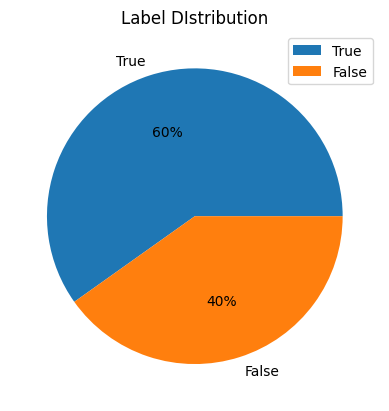

In [ ]:
"Label Distribution Countplot"
df['Label'].value_counts().to_frame().plot(kind='pie', y='Label', autopct='%.0f%%')
plt.ylabel('')
# sns.countplot(x=df["Label"])
plt.title('Label DIstribution')

In [ ]:
"Convert Label to string"
df['Label']=df['Label'].astype(str)

"Encode the class labels"
df['Label'].replace('False', 0, inplace=True)
df['Label'].replace('True', 1, inplace=True)

In [ ]:
"Extract needed columns"
df=df[['Answers', 'Label']]
df=df.rename(columns={"Answers": "content"})

"Split data to train and test"
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,  test_size=0.2, random_state=42)

In [ ]:
"lower casing"
train['content']=train['content'].str.lower()
test['content']=test['content'].str.lower()

In [ ]:
"Stop words removal"
train['content']=train['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test['content']=test['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
#Lemmatization

lemmatizer = nltk.stem.WordNetLemmatizer()
train['content']=train['content'].str.split()
test['content']=test['content'].str.split()
train['content']=train['content'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x]) # Stem every word.
test['content']=test['content'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x]) # Stem every word.

train_data=[]
test_data=[]
for i in train['content'].to_list():
  train_data.append(' '.join(i))
for i in test['content'].to_list():
  test_data.append(' '.join(i))



In [ ]:
"Split data to dependent and independet variables"

train['content']=train_data
test['content']=test_data

trainy=train['Label']
testy=test['Label']

In [ ]:
"fit TfidfVectorizer on training data and transform test data"

tf = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None, lowercase=False)
trainx=tf.fit_transform(train['content'])
testx = tf.transform(test['content'])

In [ ]:
"Modelling"
models=[LogisticRegression(), RandomForestClassifier(), svm.SVC(), lightgbm.LGBMClassifier(), GradientBoostingClassifier(), xgb.XGBClassifier(),\
        DecisionTreeClassifier(), MultinomialNB(),  CatBoostClassifier(verbose=0), KNeighborsClassifier() ]
names= ['Logistic Regression', 'Random Forest', "Support Vector Machine", 'Light GBM', 'Gradient Boost', 'XGBoost',\
        'Decision Tree','Naive Bayes',  'CatBoost', 'K Nearest Neighbor']

Result={}
for name, model in zip(names, models):
  scores=[]
  model.fit(trainx, trainy)
  y_pred=model.predict(testx)
  a=model.score(testx, testy)
  p=precision_score(testy, y_pred, average='weighted')
  r=recall_score(testy, y_pred, average='weighted')
  f=f1_score(testy, y_pred, average='weighted')
  scores.append(a)
  scores.append(p)
  scores.append(r)
  scores.append(f)

  Result[name]=scores

result=pd.DataFrame(Result).T.rename(columns={0:'Accuracy', 1: "Precision", 2: "Recall", 3: 'F1 Score'})
result=result* 100
result=result.round(1)
result.reset_index().to_csv('Result Chat GPT data.csv', sep=',', index=False)

### **Experiment 3: with Augmented Data**

In [ ]:
# Loading annotated Chat GPT dataset
df=pd.read_csv('/content/drive/MyDrive/Output/Experiment 2(Chat GPT data).csv')

# Add Facov external data
facov=pd.read_csv('/content/drive/MyDrive/Output/Experiment_3_1.csv')  # add Facov Dataset
print(facov.shape[0])
facov=facov[['content', '2class_labels']]
facov.dropna(inplace=True)

# Add FakeCovid- A Multilingual data
fake_data=pd.read_csv('/content/drive/MyDrive/Output/Experiment_3_2.csv')
print(fake_data.shape[0])
fake_data['class']=fake_data['class'].str.replace('FALSE', 'False')
fake_data=fake_data[fake_data['lang']=='en']
fake_data=fake_data[(fake_data['class']=='False') | (fake_data['class']=='True')]
fake_data=fake_data[['content_text', 'class']]

# Renaming data columns
fake_data.rename(columns={'content_text': 'content'}, inplace=True)
facov.rename(columns={'2class_labels': 'class'}, inplace=True)
df.rename(columns={'Label': 'class'}, inplace=True)
df.rename(columns={'Answers': 'content'}, inplace=True)

# Concat all three data (Chat GPT, Facov and FakeCovid- A Multilingual data) into a single dataset
data=pd.concat([df[['content','class']], facov, fake_data], axis=0).reset_index(drop=True)
data['class']=data['class'].astype(str).str.lower()

3089
7623


Text(0.5, 1.0, 'Label Distribution Countplot After Augmenting the Dataset')

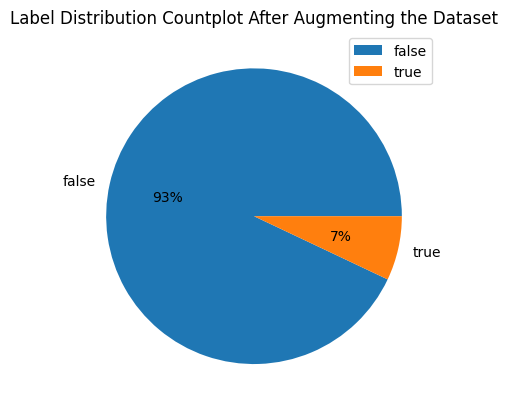

In [ ]:
# Label Distribution Countplot After Augmenting the Dataset
# Label Distribution Countplot
data['class'].value_counts().to_frame().plot(kind='pie', y='class', autopct='%.0f%%')
plt.ylabel('')
# sns.countplot(x=df["Label"])
plt.title('Label Distribution Countplot After Augmenting the Dataset')

**Modelling**

In [ ]:
# make a copy of dataset to variable df
df=data

In [ ]:
df.shape

(5903, 2)

In [ ]:
# Encode the class labels
df['class'].replace('false', 0, inplace=True)
df['class'].replace('true', 1, inplace=True)

In [ ]:
# Split data to train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,  test_size=0.2, random_state=42)

In [ ]:
# Lowercasing
train['content']=train['content'].str.lower()
test['content']=test['content'].str.lower()

In [ ]:
# Stop words removal
train['content']=train['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test['content']=test['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
# Lemmatization
lemmatizer = nltk.stem.WordNetLemmatizer()
train['content']=train['content'].str.split()
test['content']=test['content'].str.split()
train['content']=train['content'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x]) # Stem every word.
test['content']=test['content'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x]) # Stem every word.

train_data=[]
test_data=[]
for i in train['content'].to_list():
  train_data.append(' '.join(i))
for i in test['content'].to_list():
  test_data.append(' '.join(i))


In [ ]:
# Split data to dependent and independent variables
train['content']=train_data
test['content']=test_data
trainy=train['class']
testy=test['class']

In [ ]:
# fit Vectorizer on train and test data
tf = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None, lowercase=False)
trainx=tf.fit_transform(train['content'])
testx = tf.transform(test['content'])

In [ ]:
# Modelling
models=[LogisticRegression(), RandomForestClassifier(), svm.SVC(), lightgbm.LGBMClassifier(), GradientBoostingClassifier(), xgb.XGBClassifier(),\
        DecisionTreeClassifier(), MultinomialNB(),  CatBoostClassifier(verbose=0), KNeighborsClassifier() ]
names= ['Logistic Regression', 'Random Forest', "Support Vector Machine", 'Light GBM', 'Gradient Boost', 'XGBoost',\
        'Decision Tree','Naive Bayes',  'CatBoost', 'K Nearest Neighbor']

Result={}
for name, model in zip(names, models):
  scores=[]
  model.fit(trainx, trainy)
  y_pred=model.predict(testx)
  a=model.score(testx, testy)
  p=precision_score(testy, y_pred, average='weighted')
  r=recall_score(testy, y_pred, average='weighted')
  f=f1_score(testy, y_pred, average='weighted')
  scores.append(a)
  scores.append(p)
  scores.append(r)
  scores.append(f)

  Result[name]=scores

result=pd.DataFrame(Result).T.rename(columns={0:'Accuracy', 1: "Precision", 2: "Recall", 3: 'F1 Score'})
result=result* 100
result=result.round(1)
result.reset_index().to_csv('Result Chat GPT with Extended data.csv', sep=',', index=False)